In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
filenames = os.listdir('/kaggle/input/cifar-10-competition-dataset/train/train')
type(filenames)

list

In [3]:
len(filenames)

50000

In [4]:
print(filenames[:5])

['27147.png', '32352.png', '41695.png', '21130.png', '36145.png']


In [5]:
print(filenames[-5:])

['48768.png', '37246.png', '23121.png', '36054.png', '4164.png']


In [6]:
Train = '/kaggle/input/cifar-10-competition-dataset/train'
Train_Label = '/kaggle/input/cifar-10-competition-dataset/trainLabels.csv'
Test = '/kaggle/input/cifar-10-competition-dataset/test'

In [7]:
train_label = pd.read_csv(Train_Label)

In [8]:
train_label.head(5)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [9]:
train_label.tail(5)

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [10]:
train_label[train_label['id'] == 5]

,id,label
4,5,automobile


In [11]:
len(train_label)

50000

In [12]:
train_label['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [13]:
labels_dictionary = {'airplane': 0 , 'automobile': 1 , 'bird': 2 , 'cat': 3 , 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}

**Here Lebels array is created or train_Y, Here labels, such as, airplane/automobiles are converted to endcoded value**

In [14]:
label = [labels_dictionary[i] for i in train_label['label']] #Encoded label array

In [15]:
print(label[:5])
print(label[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [16]:
import cv2
from google.colab.patches import cv2_imshow

In [17]:
img = cv2.imread('/kaggle/input/cifar-10-competition-dataset/train/train/1.png')

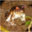

In [18]:
cv2_imshow(img)

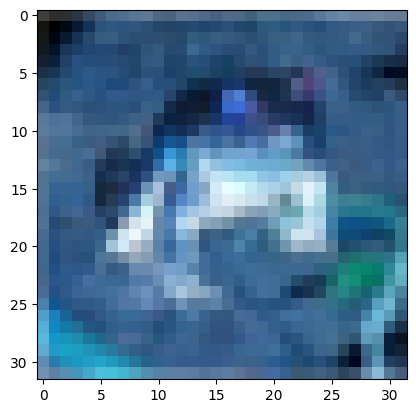

In [19]:
plt.imshow(img)

**Printing first 5data to visualize**

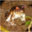

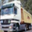

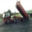

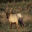

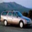

In [20]:
train_image_path = '/kaggle/input/cifar-10-competition-dataset/train/train/'

for i in train_label['id']:
    temp = cv2.imread(train_image_path + str(i) + '.png')
    cv2_imshow(temp)

    if i >= 5:
        break

**image_features are created here**

In [21]:
train_image_path = '/kaggle/input/cifar-10-competition-dataset/train/train/'
img_data = [] #Empty array

for i in train_label['id']:
    temp = cv2.imread(train_image_path + str(i) + '.png')
    img_data.append(temp)

In [22]:
type(img_data)

list

In [23]:
len(img_data)

50000

In [24]:
type(img_data[0])

numpy.ndarray

In [25]:
for i in range(5):
    print(img_data[i].shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [26]:
X = np.array(img_data)
Y = np.array(label)

In [27]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Normalizing the feature values from 0 to 1**

In [28]:
X = X/255

**Splitting train and test data**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 2)

**Building the neural network**

In [30]:
import tensorflow as tf
from tensorflow import keras

*The neural network is created*

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32 , 32 , 3)), #input layer
    keras.layers.Dense(64 , activation = 'relu'), #hidden layer
    keras.layers.Dense(10 , activation = 'softmax'), #output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


*Parameters of the neural network*

In [32]:
model.compile(
    optimizer = 'adam', #the other optimizers are
    loss = 'sparse_categorical_crossentropy', #as labels are encoded so sparse is used
    metrics = ['acc']
)

*Feeding the data to the neural network*

In [33]:
model.fit(X_train , Y_train , validation_split = 0.1 , epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.2267 - loss: 2.1196 - val_acc: 0.3088 - val_loss: 1.8980
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.3157 - loss: 1.8929 - val_acc: 0.3270 - val_loss: 1.8555
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.3347 - loss: 1.8520 - val_acc: 0.3307 - val_loss: 1.8380
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.3350 - loss: 1.8397 - val_acc: 0.3428 - val_loss: 1.8112
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.3423 - loss: 1.8231 - val_acc: 0.3368 - val_loss: 1.8348
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.3429 - loss: 1.8209 - val_acc: 0.3300 - val_loss: 1.8366
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.3425 - loss: 1.8165 - val_acc: 0.3388 - val_loss: 1.8113
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.3455 - loss: 1.8069 - val_acc: 0.3458 - val_loss: 1.7888
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [34]:
model.fit(X_train , Y_train , validation_split = 0.1 , batch_size = 10 , epochs = 10)

Epoch 1/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - acc: 0.3229 - loss: 1.8443 - val_acc: 0.3167 - val_loss: 1.8776
Epoch 2/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.3432 - loss: 1.8098 - val_acc: 0.3430 - val_loss: 1.8230
Epoch 3/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.3430 - loss: 1.8080 - val_acc: 0.3315 - val_loss: 1.8109
Epoch 4/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.3510 - loss: 1.7915 - val_acc: 0.3433 - val_loss: 1.7842
Epoch 5/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.3490 - loss: 1.7839 - val_acc: 0.3345 - val_loss: 1.8128
Epoch 6/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.3552 - loss: 1.7829 - val_acc: 0.3372 - val_loss: 1.8234
Epoch 7/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.3529 - loss: 1.7824 - val_acc: 0.3327 - val_loss: 1.8361
Epoch 8/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.3603 - loss: 1.7748 - val_acc: 0.3390 - val_loss: 1.7859
Epoch 9/10
3600/3600 ━━━━━━━━━━━━━━━━━━━